## Tutorial for basic SHAP usage

---


Download the dataset from [Link](https://www.kaggle.com/datasets/drateendrajha/health-screening-data/discussion) and put it in the same directory with this code.

Import package

In [54]:
import matplotlib.pyplot as plt

In [55]:
import shap
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Prepare a sample dataset

In [56]:
'''Import the dataset'''
csv_file_path = '.\Health Screening Data.csv'
df = pd.read_csv(csv_file_path)

invalid escape sequence '\H'
invalid escape sequence '\H'
invalid escape sequence '\H'


In [57]:
'''Show the basic info'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   69960 non-null  int64  
 1   id           69960 non-null  int64  
 2   age          69960 non-null  int64  
 3   gender       69960 non-null  int64  
 4   height       69960 non-null  int64  
 5   weight       69960 non-null  float64
 6   ap_hi        69960 non-null  int64  
 7   ap_lo        69960 non-null  int64  
 8   cholesterol  69960 non-null  int64  
 9   gluc         69960 non-null  int64  
 10  smoke        69960 non-null  int64  
 11  alco         69960 non-null  int64  
 12  active       69960 non-null  int64  
 13  cardio       69960 non-null  int64  
 14  AgeinYr      69960 non-null  int64  
 15  BMI          69960 non-null  float64
 16  BMICat       69960 non-null  object 
 17  AgeGroup     69960 non-null  object 
dtypes: float64(2), int64(14), object(2)
memory usa

Build an example ML model

In [58]:
'''Data preprocessing'''

# Drop  useless features
df = df.drop(columns = ['Unnamed: 0','id','age','AgeGroup'])

# Reduce dataset size (only for demo)

rows_to_keep = int(0.1 * len(df))
df = df.sample(n=rows_to_keep, random_state=42)



# Label encode the categorical feature (Gender & BMICat)

df['gender'] = df['gender'].astype('category')
df = pd.get_dummies(df, columns=['gender'], prefix=['gender'])

feature_to_encode = 'BMICat'
encoding_mapping = {'Under Weight': 0,'Normal': 1, 'Over Weight': 2, 'Obese': 3}

label_encoder = LabelEncoder()
df['BMIcat_encoded'] = label_encoder.fit_transform(df[feature_to_encode].map(encoding_mapping))
df = df.drop(columns = ['BMICat'])

# Split the dataset for training (target is predicting systolic pressure (ap_hi here))

X = df.drop(columns=['ap_hi'])  
y = df['ap_hi']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [59]:
X

,height,weight,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,gender_1,gender_2,BMIcat_encoded
7329,155,59.0,80,1,1,0,0,1,0,48,24.6,True,False,1
14225,167,82.0,80,1,1,0,0,0,1,61,29.4,False,True,2
33794,157,65.0,70,1,1,0,0,1,0,41,26.4,True,False,2
45198,169,73.0,80,1,1,1,0,1,0,57,25.6,False,True,2
47426,156,98.0,90,3,1,0,0,1,1,58,40.3,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11778,183,92.0,70,1,2,0,0,0,1,61,27.5,False,True,2
62039,166,69.0,80,1,1,0,0,1,1,53,25.0,True,False,2
58302,156,74.0,90,1,1,0,0,1,0,47,30.4,True,False,3
6165,160,65.0,80,1,1,0,0,1,0,39,25.4,False,True,2


In [60]:
'''Model building'''

RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
'''Model evaluation'''

pred_RF = RF.predict(X_test)

mse = mean_squared_error(y_test, pred_RF)
mae = mean_absolute_error(y_test, pred_RF)
r2 =  r2_score(y_test, pred_RF)

print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

R2:  0.4478283420208875
MAE:  8.148470136054422
MSE:  153.85172400671203
RMSE:  12.40369799723905


# Explain useing SHAP

In [62]:
'''Calculate sharpley value'''

# RF = joblib.load(r'your_directory_for_model\model.pkl') # Alternatively, load a  model

explainer = shap.TreeExplainer(RF)

shap_values = explainer(X_test)

shap_values

.values =
array([[-6.30290126e-02, -5.35543462e-02, -4.59314566e+00, ...,
        -5.29264204e-02,  3.76443999e-03,  2.06360905e-02],
       [ 1.00704712e+00,  3.02771281e-01, -1.27499067e+01, ...,
         1.47048592e-01,  2.31575656e-01, -1.48579357e-02],
       [ 5.03382161e-02, -4.18155100e-01, -3.83705917e+00, ...,
        -3.76622287e-02, -2.15813224e-02,  3.94165031e-02],
       ...,
       [-1.00433209e+00, -9.02888777e-01,  1.01214736e+01, ...,
         1.38902465e-01,  3.12529721e-03, -1.15475967e-01],
       [ 1.26482678e-01,  1.29265418e+00, -3.41383564e+00, ...,
         1.14701193e-01, -2.35184597e-02, -4.29317450e-03],
       [ 3.66384762e-01,  7.86612321e-02, -3.55819719e+00, ...,
        -6.73896453e-02, -6.38734176e-02,  2.06074338e-02]])

.base_values =
array([[126.17246605],
       [126.17246605],
       [126.17246605],
       ...,
       [126.17246605],
       [126.17246605],
       [126.17246605]])

.data =
array([[156, 90.0, 80, ..., True, False, 3],
       [159,

## Global interpretability

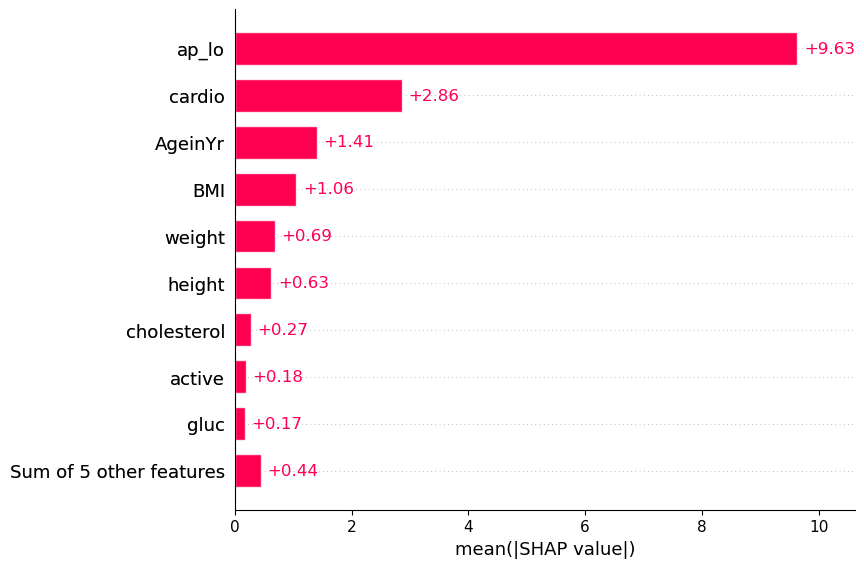

In [63]:
'''Feature importance plot'''

shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


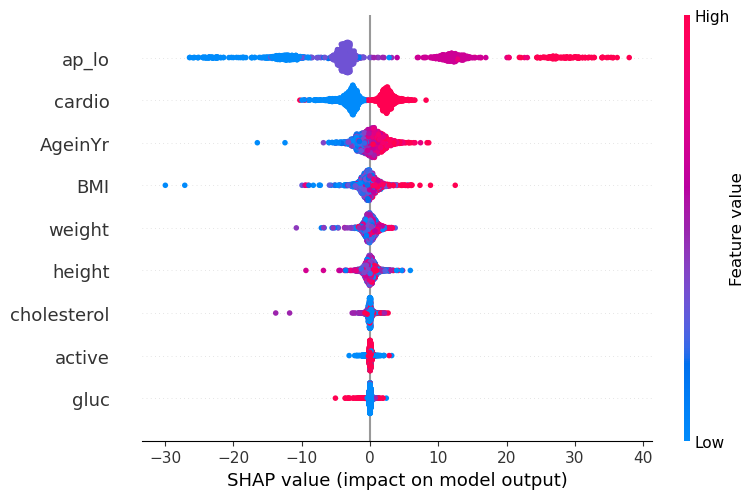

In [64]:
'''Summary plot'''
shap.summary_plot(shap_values, X_test.values,max_display=9)

## Local interpretability

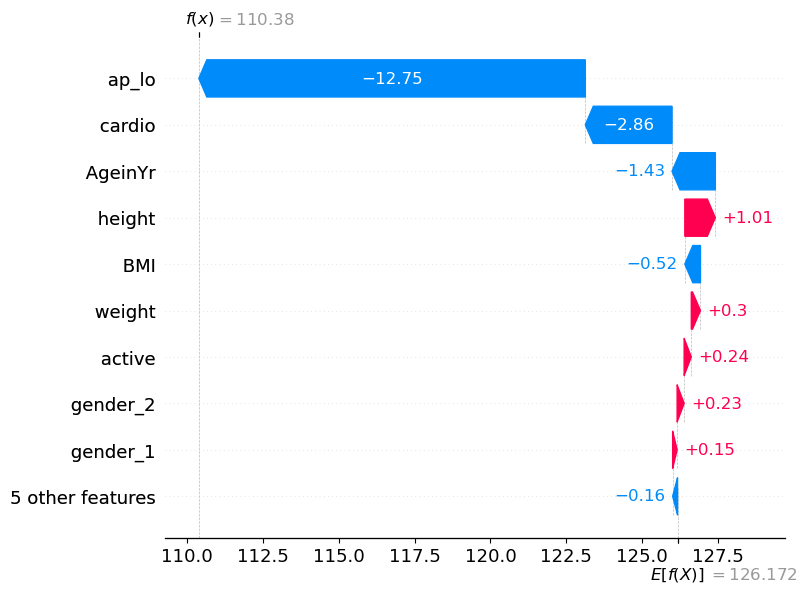

In [65]:
'''Waterfall plot'''

from shap.plots import _waterfall
_waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[1].values, X_test.iloc[1])